# Exp 9

## Création données

In [1]:
import sys
sys.path.append("C:/Users/PC-LM/Miniconda3/envs/Struct/Lib/site-packages")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm
import time
from sklearn.metrics import accuracy_score
from collections import Counter

In [4]:
lower_bound = -2
upper_bound = 2
interval = upper_bound - lower_bound
nb_points_by_ax = 100
inter_between_each_point = interval/(nb_points_by_ax -1)

print(inter_between_each_point)

0.04040404040404041


In [5]:
list_points = []
for i in range(nb_points_by_ax):
    for j in range(nb_points_by_ax):
        list_points.append((lower_bound + i*inter_between_each_point, lower_bound + j*inter_between_each_point))
        
print(len(list_points))

10000


In [6]:
list_points[0:10]

[(-2.0, -2.0),
 (-2.0, -1.9595959595959596),
 (-2.0, -1.9191919191919191),
 (-2.0, -1.878787878787879),
 (-2.0, -1.8383838383838385),
 (-2.0, -1.797979797979798),
 (-2.0, -1.7575757575757576),
 (-2.0, -1.7171717171717171),
 (-2.0, -1.6767676767676767),
 (-2.0, -1.6363636363636362)]

In [7]:
df = pd.DataFrame(list_points, columns = ["x", "y"])

print(df.head())

     x         y
0 -2.0 -2.000000
1 -2.0 -1.959596
2 -2.0 -1.919192
3 -2.0 -1.878788
4 -2.0 -1.838384


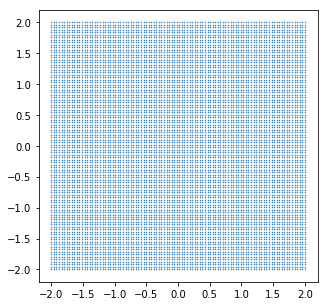

In [8]:
plt.figure(figsize=(5,5))

plt.scatter(df["x"], df["y"], marker = ".", s = 1)
plt.show()

In [21]:
df.head()

,x,y
0,-2.0,-2.000000
1,-2.0,-1.959596
2,-2.0,-1.919192
3,-2.0,-1.878788
4,-2.0,-1.838384


In [9]:
# 0 in, 1 out
df["x_10_bits"] = (df["x"] * (2**9)).astype('int32')
df["y_10_bits"] = (df["y"] * (2**9)).astype('int32')

df['label'] = np.where(df['x']**2 + df["y"]**2 <= 1.6**2, 0, 1)

print(df.head(25))

      x         y  x_10_bits  y_10_bits  label
0  -2.0 -2.000000      -1024      -1024      1
1  -2.0 -1.959596      -1024      -1003      1
2  -2.0 -1.919192      -1024       -982      1
3  -2.0 -1.878788      -1024       -961      1
4  -2.0 -1.838384      -1024       -941      1
5  -2.0 -1.797980      -1024       -920      1
6  -2.0 -1.757576      -1024       -899      1
7  -2.0 -1.717172      -1024       -879      1
8  -2.0 -1.676768      -1024       -858      1
9  -2.0 -1.636364      -1024       -837      1
10 -2.0 -1.595960      -1024       -817      1
11 -2.0 -1.555556      -1024       -796      1
12 -2.0 -1.515152      -1024       -775      1
13 -2.0 -1.474747      -1024       -755      1
14 -2.0 -1.434343      -1024       -734      1
15 -2.0 -1.393939      -1024       -713      1
16 -2.0 -1.353535      -1024       -693      1
17 -2.0 -1.313131      -1024       -672      1
18 -2.0 -1.272727      -1024       -651      1
19 -2.0 -1.232323      -1024       -630      1
20 -2.0 -1.19

In [10]:
df["x_bin"] = df["x_10_bits"].apply(lambda x : format(x if x >= 0 else (1 << 16) + x, '016b'))
df["y_bin"] = df["y_10_bits"].apply(lambda x : format(x if x >= 0 else (1 << 16) + x, '016b'))

print(df.head(20))

      x         y  x_10_bits  y_10_bits  label             x_bin  \
0  -2.0 -2.000000      -1024      -1024      1  1111110000000000   
1  -2.0 -1.959596      -1024      -1003      1  1111110000000000   
2  -2.0 -1.919192      -1024       -982      1  1111110000000000   
3  -2.0 -1.878788      -1024       -961      1  1111110000000000   
4  -2.0 -1.838384      -1024       -941      1  1111110000000000   
5  -2.0 -1.797980      -1024       -920      1  1111110000000000   
6  -2.0 -1.757576      -1024       -899      1  1111110000000000   
7  -2.0 -1.717172      -1024       -879      1  1111110000000000   
8  -2.0 -1.676768      -1024       -858      1  1111110000000000   
9  -2.0 -1.636364      -1024       -837      1  1111110000000000   
10 -2.0 -1.595960      -1024       -817      1  1111110000000000   
11 -2.0 -1.555556      -1024       -796      1  1111110000000000   
12 -2.0 -1.515152      -1024       -775      1  1111110000000000   
13 -2.0 -1.474747      -1024       -755      1  

In [11]:
df['color'] = np.where(df['label'] == 1, "lightgreen", "steelblue")  

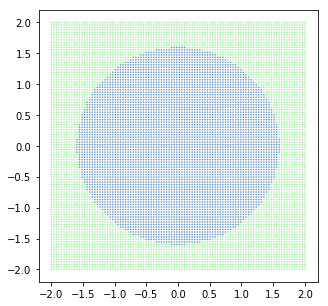

In [12]:
plt.figure(figsize=(5,5))

plt.scatter(df["x"], df["y"], c = df["color"], marker = ".", s = 1)
plt.show()

In [13]:
df["xy"] = df["x_bin"] + df["y_bin"]
print(df.head())

     x         y  x_10_bits  y_10_bits  label             x_bin  \
0 -2.0 -2.000000      -1024      -1024      1  1111110000000000   
1 -2.0 -1.959596      -1024      -1003      1  1111110000000000   
2 -2.0 -1.919192      -1024       -982      1  1111110000000000   
3 -2.0 -1.878788      -1024       -961      1  1111110000000000   
4 -2.0 -1.838384      -1024       -941      1  1111110000000000   

              y_bin       color                                xy  
0  1111110000000000  lightgreen  11111100000000001111110000000000  
1  1111110000010101  lightgreen  11111100000000001111110000010101  
2  1111110000101010  lightgreen  11111100000000001111110000101010  
3  1111110000111111  lightgreen  11111100000000001111110000111111  
4  1111110001010011  lightgreen  11111100000000001111110001010011  


In [19]:
type(df["xy"].iloc[5])

str

In [14]:
## X_train, y_train, X_test, y_test
X_tmp = df["xy"].str.split().tolist()
print(X_tmp[0:10])

X = []

for i in tqdm.tqdm(range(len(X_tmp))):
    X.append(list(map(int, list(X_tmp[i][0]))))

[['11111100000000001111110000000000'], ['11111100000000001111110000010101'], ['11111100000000001111110000101010'], ['11111100000000001111110000111111'], ['11111100000000001111110001010011'], ['11111100000000001111110001101000'], ['11111100000000001111110001111101'], ['11111100000000001111110010010001'], ['11111100000000001111110010100110'], ['11111100000000001111110010111011']]


100%|████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 129566.20it/s]


## Séparation test et train

In [15]:
# split 50%

X_train = X[0::2]
X_test = X[1::2]

y = list(df["label"])
y_train = np.array(y[0::2])
y_test = np.array(y[1::2])

print(len(X_train))
print(len(y_train))

print(X_train[0:5])
print(X_test[0:5])

X_train = np.array(X_train)
X_test = np.array(X_test)
print(type(X_train))


5000
5000
[[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0]]
[[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1]]
<class '

In [75]:
print(len(X_train[0]))

32


# Réseau de luts

In [16]:
class LUT:
    def __init__(self, inputs, indexes_0, indexes_1, k , index = []):
        # build lut
        self.k = k
        if (index == []):
            self.index = np.sort(np.random.choice(len(inputs[0]),k,replace = False))
        else:
            self.index = index
        self.inv = np.arange(k-1,-1,-1)
        self.output = np.zeros((2**k), int)
        self.count_0 = np.zeros((2**k), int)
        self.count_1 = np.zeros((2**k), int)
        self.count(inputs[:,self.index], indexes_0,indexes_1)
        
    def count(self, subset, indexes_0, indexes_1):
        zeros = Counter(np.sort(self.get_index_vec_to_dec(subset[indexes_0])))
        ones =  Counter(np.sort(self.get_index_vec_to_dec(subset[indexes_1])))
        for key in zeros.keys():
            self.count_0[key] = zeros[key]
        for key in ones.keys():
            self.count_1[key] = ones[key]
        # compute lut
        self.output[self.count_0 > self.count_1] = 0
        self.output[self.count_0 < self.count_1] = 1
        # picked uniformly at random
        self.output[self.count_0 == self.count_1] = np.random.choice([0,1], len(self.output[self.count_0 == self.count_1]))
        
    def get_index_vec_to_dec(self, X , axis = 1):
        dec_index = np.sum(X * np.power(2*np.ones(self.k,int),self.inv),axis= axis)
        return dec_index
    
    def get_index_dec_to_vec(self, dec):
        return "{0:b}".format(dec).zfill(self.k)
    
    def look(self, X):
        # X is a numpy array
        X = np.array(X)
        return self.output[self.get_index_vec_to_dec(X[self.index], 0)]
    
    def look_array(self, dataset):
        subdataset = dataset[:,self.index]
        return self.output[self.get_index_vec_to_dec(subdataset)]
        
    def score(self, labels, dataset):
        predicted = self.look_array(dataset)
        return accuracy_score(labels,predicted)
    
    def show(self):
        print("Look up table")
        print("Index = {}".format(self.index))
        print("  p    |  y0 |  y1 |  f   |")
        for i in range(len(self.output)):
            if (self.count_0[i] == self.count_1[i]):
                f = "{}*".format(self.output[i])
            else:
                f = "{} ".format(self.output[i])
            print("  {}   |  {}  |  {}  |  {}  |".format(self.get_index_dec_to_vec(i), self.count_0[i], self.count_1[i], f))
            
    def clean(self):
        self.count_0 = None
        self.count_1 = None

In [17]:
class NLUTS :
    def __init__(self,k,n_luts = [1024,512,512,256,16,1], n_layer = 6):
        self.layers = []
        self.k = k
        self.n_layer = n_layer
        self.n_luts = n_luts
    
    def train(self,X_train,y_train, indexes_0, indexes_1):

        inputs = X_train
        outputs = inputs
        # hidden layers + 1 output layer
        for l in range(self.n_layer):
            layer = []
            inputs = outputs
            outputs = np.zeros((len(X_train),self.n_luts[l]),int)
            for i in range(n_luts[l]):
                lut = LUT(inputs, indexes_0, indexes_1, self.k)
                outputs[:,i] = lut.look_array(inputs)
                layer.append(lut)
            self.layers.append(layer)
        return outputs
    
    def predict(self,X,y):
        inputs = X
        outputs = inputs
        for layer in self.layers:
            inputs = outputs
            outputs = np.zeros((len(X),len(layer)),int)
            for i in range(len(layer)):
                outputs[:,i] = layer[i].look_array(inputs)
        return outputs
    
    def score(self,X,y):
        return accuracy_score(y, self.predict(X,y))

## 6 couches cachées

In [19]:
n_luts = [2048,2048,2048,2048,2048,1] # number of luts per layer
k_list = [2,6,10] # sampling input

nn_list = []

indexes_0 = np.where(y_train == 0) 
indexes_1 = np.where(y_train == 1)

train_accuracy = []
test_accuracy = []
y_preds_train = []
y_preds_test = []

start = time.time()

for k in tqdm.tqdm(k_list):
    interm = time.time()
    
    nn = NLUTS(k,n_luts)
    outputs = nn.train(X_train,y_train, indexes_0, indexes_1)
    nn_list.append(nn)
    print("k = {} training accuracy : {:.3f}".format(k,accuracy_score(y_train, outputs)))
    train_accuracy.append(accuracy_score(y_train, outputs))
    y_preds_train.append(outputs)
    print("k = {} test accuracy : {:.3f}".format(k,nn.score(X_test,y_test)))
    test_accuracy.append(nn.score(X_test,y_test))
    y_preds_test.append(nn.predict(X_test, y_test))
    
    end = time.time() - interm
    print("Time spent :{:.2f}s".format(end))
end = time.time() - start
print("Total Time spent : {:.2f}s".format(end))


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

k = 2 training accuracy : 0.623
k = 2 test accuracy : 0.459
Time spent :20.06s



 33%|████████████████████████████                                                        | 1/3 [00:20<00:40, 20.06s/it]

k = 6 training accuracy : 0.984
k = 6 test accuracy : 0.891
Time spent :30.84s



 67%|████████████████████████████████████████████████████████                            | 2/3 [00:50<00:25, 25.45s/it]

k = 10 training accuracy : 1.000
k = 10 test accuracy : 0.515
Time spent :45.33s



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:36<00:00, 32.07s/it]


Total Time spent : 96.24s


In [51]:
y_pred_train_color_2 = ["lightgreen" if y_pred==1 else "steelblue" for y_pred in y_preds_train[0].T[0]]
y_pred_test_color_2 = ["lightgreen" if y_pred==1 else "steelblue" for y_pred in y_preds_test[0].T[0]]

y_pred_train_color_6 = ["lightgreen" if y_pred==1 else "steelblue" for y_pred in y_preds_train[1].T[0]]
y_pred_test_color_6 = ["lightgreen" if y_pred==1 else "steelblue" for y_pred in y_preds_test[1].T[0]]

y_pred_train_color_10 = ["lightgreen" if y_pred==1 else "steelblue" for y_pred in y_preds_train[2].T[0]]
y_pred_test_color_10 = ["lightgreen" if y_pred==1 else "steelblue" for y_pred in y_preds_test[2].T[0]]

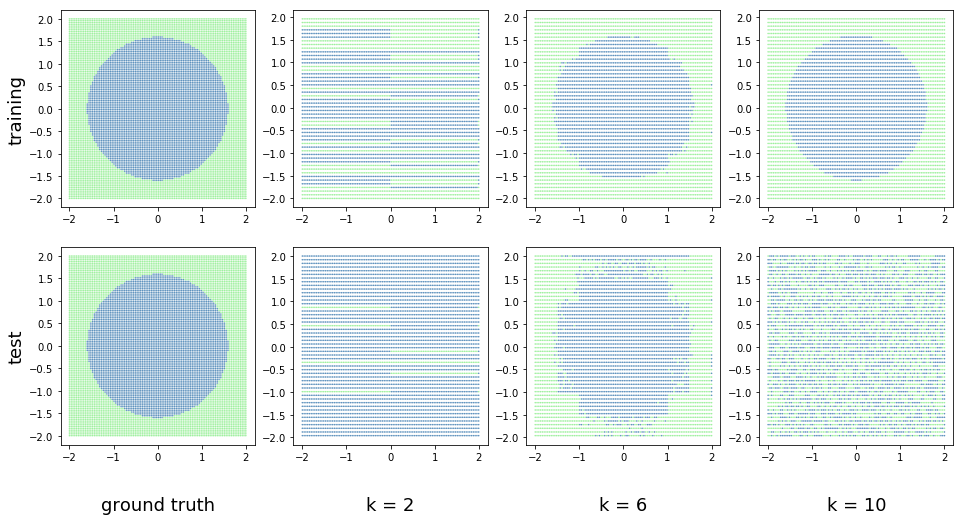

In [111]:
cols = ['ground truth', 'k = 2', 'k = 6', 'k = 10']
rows = ['training', 'test']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

axes[0,0].scatter(df["x"], df["y"], c = df["color"], marker = ".", s = 1)

axes[0,1].scatter(df["x"].iloc[0::2], df["y"].iloc[0::2], c = y_pred_train_color_2, marker = ".", s = 1)

axes[0,2].scatter(df["x"].iloc[0::2], df["y"].iloc[0::2], c = y_pred_train_color_6, marker = ".", s = 1)

axes[0,3].scatter(df["x"].iloc[0::2], df["y"].iloc[0::2], c = y_pred_train_color_10, marker = ".", s = 1)


axes[1,0].scatter(df["x"], df["y"], c = df["color"], marker = ".", s = 1)


axes[1,1].scatter(df["x"].iloc[1::2], df["y"].iloc[1::2], c = y_pred_test_color_2, marker = ".", s = 1)

axes[1,2].scatter(df["x"].iloc[1::2], df["y"].iloc[1::2], c = y_pred_test_color_6, marker = ".", s = 1)

axes[1,3].scatter(df["x"].iloc[1::2], df["y"].iloc[1::2], c = y_pred_test_color_10, marker = ".", s = 1)

for ax, col in zip(axes[0], cols):
    ax.set_title(col, fontsize=18, pad=-500)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, fontsize=18)
    
plt.show()
